In [1]:
import pandas as pd 
from tensorflow import keras
import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import numpy as np
import cv2 
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [12]:
image_size = (104,104)
batch_size = 32

In [13]:
def сorrecting_data():
    x = []
    y = []
    boxes = []
    df = pd.read_csv('_annotations.csv') 
    for x1,y1,x2,y2 in zip(df['xmin'].apply(lambda x: x // 4), list(df['ymin'].apply(lambda x: x // 4)), 
                       list(df['xmax'].apply(lambda x: x // 4)), list(df['ymax'].apply(lambda x: x // 4))):
        arr = [x1, y1, x2, y2]
        boxes.append(arr)
    return df, boxes

In [14]:
def data_metrics(df,boxes,image_size):
    images = []
    
    for index, boxes in df.iterrows():
        image = cv2.imread(index)
        image = cv2.resize(image,image_size)
        images.append(image)
    return images

In [15]:
# Масштабирование и преобразование извлеченных областей
def data_test_fun(images, coordinates, image_size):
    return np.array(images), np.array(coordinates)

In [16]:
df_trash = pd.DataFrame({'filename': os.listdir('DataSet_cars_valid\\1_trash')})
df_trash = df_trash.set_index('filename')
df_trash = df_trash.astype(str)

In [17]:
%cd DataSet_cars_valid/valid
df_train, boxes_train = сorrecting_data()
df_train = df_train.set_index('filename')
image_train = data_metrics(df_train, boxes_train,image_size)
%cd ../..

C:\Users\Matvey\Проект\Project\DataSet_cars_valid\valid
C:\Users\Matvey\Проект\Project


In [18]:
boxes_train = np.array(boxes_train)
boxes_train = boxes_train.astype(np.int)
boxes_train = boxes_train.tolist()

C:\Users\Matvey\AppData\Local\Temp\ipykernel_8120\841383010.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boxes_train = boxes_train.astype(np.int)


In [9]:
len(df_train)

2619

In [19]:
region_train, image_car = data_test_fun(image_train, boxes_train, image_size)

In [11]:
for i, image in enumerate(region_train):
    x, y, width, height = boxes_train[i]
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
    cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [20]:
model = keras.Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(104,104,3)),  # свёрточный слой
    #попробуй по 2-3 свёрточных слоя сделать
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

#     Conv2D(128, (3, 3), activation='relu'),  # свёрточный слой
#     MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
#     Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(256, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

#     Conv2D(256, (3, 3), activation='relu'),  # свёрточный слой
#     MaxPooling2D((2, 2), strides=2),  # уменьшеи карт признаков
#     Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

#     Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
#     MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
#     Dropout(0.2),  # отключение 20 процентов нейронов

    Flatten(),
    Dense(512, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(256, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(4, activation='linear'),  # выходной слой
])


In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['Accuracy'])

In [21]:
train_data, val_data, train_labels, val_labels = train_test_split(
    region_train, image_car, test_size=0.2, random_state=42)

TypeError: Invalid shape (4,) for image data

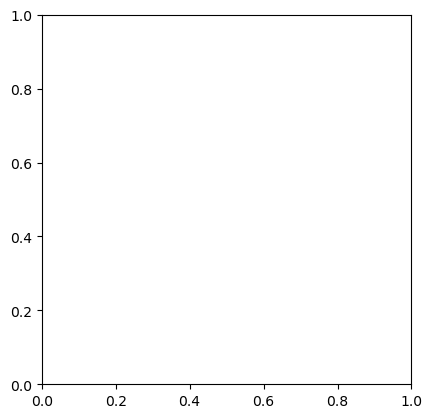

In [27]:
test = tf.convert_to_tensor(train_labels[2])
plt.imshow(test, cmap='gray')
plt.show()

In [28]:
train_labels

array([[  4,  15,  98,  99],
       [  8,  40,  93,  90],
       [  1,  14,  98,  94],
       ...,
       [  5,  19,  94,  94],
       [  8,   6, 100,  96],
       [  3,   5, 100,  97]])

In [18]:
history = model.fit(train_data, train_labels, epochs = 60, batch_size = batch_size, validation_data = (val_data, val_labels))

Epoch 1/60
66/66 [==============================] - 4s 44ms/step - loss: 207.0043 - Accuracy: 0.7026 - val_loss: 942.7785 - val_Accuracy: 0.7996
Epoch 2/60
66/66 [==============================] - 3s 41ms/step - loss: 155.7586 - Accuracy: 0.7055 - val_loss: 636.6970 - val_Accuracy: 0.7271
Epoch 3/60
66/66 [==============================] - 3s 41ms/step - loss: 145.5830 - Accuracy: 0.7365 - val_loss: 496.9525 - val_Accuracy: 0.7519
Epoch 4/60
66/66 [==============================] - 3s 41ms/step - loss: 143.3127 - Accuracy: 0.7117 - val_loss: 389.6717 - val_Accuracy: 0.7939
Epoch 5/60
66/66 [==============================] - 3s 41ms/step - loss: 145.5749 - Accuracy: 0.7251 - val_loss: 464.2619 - val_Accuracy: 0.7920
Epoch 6/60
66/66 [==============================] - 3s 41ms/step - loss: 139.6897 - Accuracy: 0.7375 - val_loss: 598.9453 - val_Accuracy: 0.7557
Epoch 7/60
66/66 [==============================] - 3s 41ms/step - loss: 133.1240 - Accuracy: 0.7179 - val_loss: 525.4716 - val_Ac

In [25]:
model.save('metrics_test_val_60_3.h5')

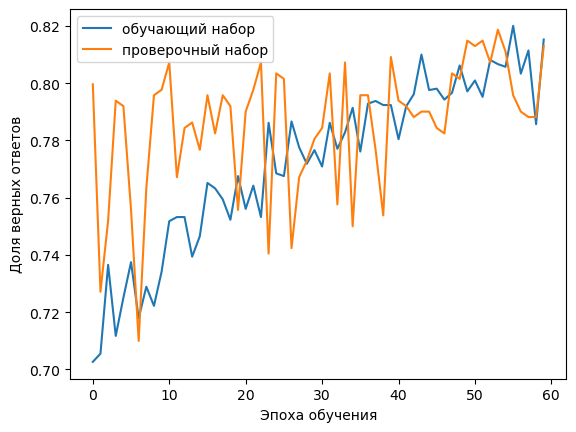

In [24]:
plt.plot(history.history['Accuracy'],
         label='обучающий набор')
plt.plot(history.history['val_Accuracy'],
         label='проверочный набор')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()